# Goal
A/B tests play a huge role in website optimization. Analyzing A/B tests data is a very important
data scientist responsibility. Especially, data scientists have to make sure that results are
reliable, trustworthy, and conclusions can be drawn.

Furthermore, companies often run tens, if not hundreds, of A/B tests at the same time. Manually
analyzing all of them would require lot of time and people. Therefore, it is common practice to
look at the typical A/B test analysis steps and try to automate as much as possible. This frees
up time for the data scientists to work on more high level topics.

Analyze results from an A/B test. Also, design an algorithm to automate some steps.

# Challenge Description



Company XYZ is a worldwide e-commerce site with localized versions of the site.

A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than
any other Spanish-speaking country. She therefore went and talked to the international team in
charge of Spain And LatAm to see if they had any ideas about why that was happening.

Spain and LatAm country manager suggested that one reason could be translation. All Spanishspeaking countries had the same translation of the site which was written by a Spaniard. They
agreed to try a test where each country would have its one translation written by a local. That is,
Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican
and so on. Obviously, nothing would change for users from Spain.

After they run the test however, they are really surprised cause the test is negative. I.e., it
appears that the non-localized translation was doing better!

Asked to:

* Confirm that the test is actually negative. That is, it appears that the old version of the
site with just one translation across Spain and LatAm performs better
* Explain why that might be happening. Are the localized translations really worse?
* If you identified what was wrong, design an algorithm that would return FALSE if the
same problem is happening in the future and TRUE if everything is good and the results
can be trusted.

# Data

## Columns:
### Test Table
* user_id : the id of the user. Unique by user. Can be joined to user id in the other table.
For each user, we just check whether conversion happens the first time they land on the
site since the test started.
* date : when they came to the site for the first time since the test started
* source : marketing channel: Ads, SEO, Direct . Direct means everything except for ads
and SEO. Such as directly typing site URL on the browser, downloading the app w/o
coming from SEO or Ads, referral friend, etc.
* device : device used by the user. It can be mobile or web
* browser_language : in browser or app settings, the language chosen by the user. It can
be EN, ES, Other (Other means any language except for English and Spanish)
* ads_channel : if marketing channel is ads, this is the site where the ad was displayed. It
can be: Google, Facebook, Bing, Yahoo ,Other. If the user didn't come via an ad, this
field is NA
* browser : user browser. It can be: IE, Chrome, Android_App, FireFox, Iphone_App,
Safari, Opera
* conversion : whether the user converted (1) or not (0). This is our label. A test is
considered successful if it increases the proportion of users who convert.
* test : users are randomly split into test (1) and control (0). Test users see the new
translation and control the old one. For Spain-based users, this is obviously always 0
since there is no change there.

### User Table`

* user_id : the id of the user. It can be joined to user id in the other table
* sex : user sex: Male or Female
* age : user age (self-reported)
* country : user country based on ip address


In [216]:
# read the data into python
import pandas as pd
import numpy as np
test_table = pd.read_csv('test_table.csv')
user_table = pd.read_csv('user_table.csv')

In [218]:
#look at the data type
test_table.dtypes

user_id              int64
date                object
source              object
device              object
browser_language    object
ads_channel         object
browser             object
conversion           int64
test                 int64
dtype: object

In [220]:
user_table.dtypes

user_id     int64
sex        object
age         int64
country    object
dtype: object

In [222]:
# look the several row of data
test_table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,12/3/2015,Direct,Web,ES,NaN,IE,1,0
1,497851,12/4/2015,Ads,Web,ES,Google,IE,0,1
2,848402,12/4/2015,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,12/3/2015,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,11/30/2015,Ads,Web,ES,Google,FireFox,0,1


In [224]:
user_table.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [226]:
test_table.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [228]:
test_table.drop_duplicates

<bound method DataFrame.drop_duplicates of         user_id        date  source  device browser_language ads_channel  \
0        315281   12/3/2015  Direct     Web               ES         NaN   
1        497851   12/4/2015     Ads     Web               ES      Google   
2        848402   12/4/2015     Ads     Web               ES    Facebook   
3        290051   12/3/2015     Ads  Mobile            Other    Facebook   
4        548435  11/30/2015     Ads     Web               ES      Google   
...         ...         ...     ...     ...              ...         ...   
453316   425010   12/4/2015     SEO     Web               ES         NaN   
453317   826793   12/1/2015     SEO  Mobile               ES         NaN   
453318   514870   12/2/2015     Ads  Mobile               ES        Bing   
453319   785224   12/4/2015     SEO  Mobile               ES         NaN   
453320   241662   12/4/2015     Ads     Web               ES    Facebook   

            browser  conversion  test  
0   

In [230]:
user_table.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [232]:
user_table.drop_duplicates

<bound method DataFrame.drop_duplicates of         user_id sex  age    country
0        765821   M   20     Mexico
1        343561   F   27  Nicaragua
2        118744   M   23   Colombia
3        987753   F   27  Venezuela
4        554597   F   20      Spain
...         ...  ..  ...        ...
452862   756215   F   27  Venezuela
452863    36888   M   18  Argentina
452864   800559   M   28    Bolivia
452865   176584   M   19      Chile
452866   314649   M   24     Mexico

[452867 rows x 4 columns]>

In [234]:
distinct_user = np.unique(user_table['user_id'])
print('distinct user number:', distinct_user.size )
print('all user number:', user_table['user_id'].size)

distinct user number: 452867
all user number: 452867


In [236]:
#Looks like the user table is busted and we have some user ids missing. When joining, we have to be careful to do not lose the user ids in the test table, but not in the user table.
test_user = np.unique(test_table['user_id'])
print('distinct user number of test table:', test_user.size )
print('all user number for user table:', user_table['user_id'].size)
print('different number of user between test and user table', test_user.size-user_table['user_id'].size)


distinct user number of test table: 453321
all user number for user table: 452867
different number of user between test and user table 454


In [238]:
# join two table
all_table = test_table.merge(user_table, on = 'user_id', how = 'left')
all_table.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [239]:
all_table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,12/3/2015,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,12/4/2015,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,12/4/2015,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,12/3/2015,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,11/30/2015,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [278]:
all_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   date              453321 non-null  object 
 2   source            453321 non-null  object 
 3   device            453321 non-null  object 
 4   browser_language  453321 non-null  object 
 5   ads_channel       181877 non-null  object 
 6   browser           453321 non-null  object 
 7   conversion        453321 non-null  int64  
 8   test              453321 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [ ]:
# look at the result of conversion to make sure it is ture spain converts much better than the rest of LatAm countries.
all_table_conversion = all_table.groupby(['country','test'],dropna=False, as_index= False).mean()
all_table_conversion



In [243]:
# implement t-test on different test set except spanish
data_no_spanish = all_table[all_table['country'] != 'Spain']
data_no_spanish_conversion = data_no_spanish[['country', 'test', 'conversion']]


In [245]:
#separate into two set
data_no_spanish_conversion_0 = data_no_spanish_conversion[data_no_spanish_conversion['test'] == 0]
data_no_spanish_conversion_0 = data_no_spanish_conversion_0.dropna()

In [247]:
data_no_spanish_conversion_1 = data_no_spanish_conversion[data_no_spanish_conversion['test'] == 1]
data_no_spanish_conversion_1 = data_no_spanish_conversion_1.dropna()


In [249]:
print("the mean of test 0", data_no_spanish_conversion_0['conversion'].mean())
print("the mean of test 1", data_no_spanish_conversion_1['conversion'].mean())

the mean of test 0 0.04829179055749524
the mean of test 1 0.043411161678422794


In [251]:
#conduct two-sample t-test for two set
import scipy.stats as stats
print(data_no_spanish_conversion_1.var(), data_no_spanish_conversion_0.var())

test          0.000000
conversion    0.041527
dtype: float64 test          0.00000
conversion    0.04596
dtype: float64


D:\temp\ipykernel_15816\3191335703.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data_no_spanish_conversion_1.var(), data_no_spanish_conversion_0.var())


In [253]:
stats.ttest_ind(a = data_no_spanish_conversion_1['conversion'], b = data_no_spanish_conversion_0['conversion'], equal_var= True )

Ttest_indResult(statistic=-7.382252163053968, pvalue=1.559329277881674e-13)

two hypothesis for two sample t-test:

$H_0$: $\mu_1$ = $\mu_2$ (two population means are equal)

$H_1$: $\mu_1$ $\neq$ $\mu_2$ (two population mean are not equal)

let set the significant value equal 0.05 ($\alpha$ = 0.05)

The p-value is 1.559329277881674e-13, which is less than the 0.05, so we reject the null hypothesis of the test.
That's mean, we have sufficient evidence to say that the mean of conversion rate between two test are different


Look at the mean of conversion for two test, the mean of test 1 is 4.8%, the mean of test 0 is 4.3%
That’s a 10% drop, which would be dramatic if it were true. The most likely reason for weird A/B test results are:

1.We didn't collect enough data.

2.Some bias has been introduced in the experiment so that test/control people are not really random.


In data science, whenever result appear too bad or too good to be true, they are not true.

Firstly, let's plot day by day, to see if these weired result have been constantly happening
or they just started happening all of a sudden.

<AxesSubplot:xlabel='date', ylabel='test_vs_control'>

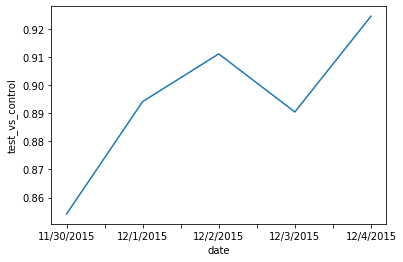

In [255]:
data_test_by_day = data_no_spanish.groupby(['test', 'date'], as_index = False).mean()
data_test_by_day_test0 = data_test_by_day[data_test_by_day['test'] == 0]
data_test_by_day_test1 = data_test_by_day[data_test_by_day['test'] == 1]
data_test_by_day_test = data_test_by_day_test1.merge(data_test_by_day_test0, on = 'date').set_index('date')
data_test_by_day_ratio = data_test_by_day_test['conversion_x']/data_test_by_day_test['conversion_y']
data_test_by_day_ratio.plot.line(ylabel = 'test_vs_control')



From the plot, we notice a couple of things:
1. Test has constantly been worse than control and there is relatively little variance across days. That
probably means that we do have enough data, but there was some bias in the experiment set up.
2. On a side note, we just ran it for 5 days. We should always run the test for at least 1 full week to
capture weekly patterns, 2 weeks would be much better.

Time to find out the bias! Likely, there is for some reason some segment of users more likely to end up in
test or in control, this segment had a significantly above/below conversion rate and this affected the overall
results.

In an ideal world, the distribution of people in test and control for each segment should be the same. There
are many ways to DIFDL this. One way is to build a decision tree where the variables are the user
dimensions and the outcome variable is whether the user is in test or control. If the tree splits, it means
that for given values of that variable you are more likely to end up in test or control. But this should be
impossible! Therefore, if the randomization worked, the tree should not split at all (or at least not be able to
separate the two classes well).


In [281]:
all_table.groupby('browser').mean()

,user_id,conversion,test,age
browser,,,,
Android_App,499834.243169,0.050021,0.478235,27.123347
Chrome,500238.739613,0.049456,0.478784,27.158149
FireFox,500780.805745,0.049747,0.475347,27.093514
IE,499304.388058,0.049129,0.473856,27.149848
Iphone_App,499382.656013,0.050406,0.475430,27.101430
Opera,496907.400985,0.053695,0.474056,27.074129
Safari,500773.622209,0.047169,0.470376,27.140545


In [283]:
tree_data = all_table.drop(columns = 'conversion')
tree_data.dropna(how = 'any', inplace = True)
tree_data

,user_id,date,source,device,browser_language,ads_channel,browser,test,sex,age,country
1,497851,12/4/2015,Ads,Web,ES,Google,IE,1,M,21.0,Mexico
2,848402,12/4/2015,Ads,Web,ES,Facebook,Chrome,0,M,34.0,Spain
3,290051,12/3/2015,Ads,Mobile,Other,Facebook,Android_App,1,F,22.0,Mexico
4,548435,11/30/2015,Ads,Web,ES,Google,FireFox,1,M,19.0,Mexico
9,10427,12/4/2015,Ads,Mobile,ES,Facebook,Android_App,0,F,33.0,Mexico
...,...,...,...,...,...,...,...,...,...,...,...
453307,39677,11/30/2015,Ads,Mobile,ES,Yahoo,Iphone_App,0,M,18.0,Venezuela
453314,209738,12/4/2015,Ads,Web,ES,Facebook,Chrome,1,M,21.0,Bolivia
453315,783089,12/2/2015,Ads,Mobile,ES,Bing,Android_App,0,F,20.0,Mexico
453318,514870,12/2/2015,Ads,Mobile,ES,Bing,Android_App,0,M,25.0,Spain


In [261]:
label = ['date', 'source', 'device', 'browser_language', 'ads_channel', 'browser', 'sex', 'country']

for i in label:
   tree_data[i].replace(all_table[i].unique(),range(len(all_table[i].unique())), inplace = True)
tree_data.head()
tree_data.dropna(how = 'any', inplace = True)
tree_data_test = tree_data.loc[:,'test']
tree_data_variable = tree_data.drop(columns = 'test')

In [263]:
tree_data_variable.head()

,user_id,date,source,device,browser_language,ads_channel,browser,sex,age,country
1,497851,1,1,0,0,1,0,0,21.0,1
2,848402,1,1,0,0,2,1,0,34.0,0
3,290051,0,1,1,1,2,2,1,22.0,1
4,548435,2,1,0,0,1,3,0,19.0,1
9,10427,1,1,1,0,2,2,1,33.0,1


user_id   date  source  device  browser_language  \
country     test                                                     
Argentina   0        9356   9356    9356    9356              9356   
            1       37377  37377   37377   37377             37377   
Bolivia     0        5550   5550    5550    5550              5550   
            1        5574   5574    5574    5574              5574   
Chile       0        9853   9853    9853    9853              9853   
            1        9884   9884    9884    9884              9884   
Colombia    0       27088  27088   27088   27088             27088   
            1       26972  26972   26972   26972             26972   
Costa Rica  0        2660   2660    2660    2660              2660   
            1        2649   2649    2649    2649              2649   
Ecuador     0        8036   8036    8036    8036              8036   
            1        7859   7859    7859    7859              7859   
El Salvador 0        4108   4108    4108    4108              4108   
            1        4067   4067    4067    4067              4067   
Guatemala   0        7622   7622    7622    7622              7622   
            1        7503   7503    7503    7503              7503   
Honduras    0        4361   4361    4361    4361              4361   
            1        4207   4207    4207    4207              4207   
Mexico      0       64209  64209   64209   64209             64209   
            1       64275  64275   64275   64275             64275   
Nicaragua   0        3419   3419    3419    3419              3419   
            1        3304   3304    3304    3304              3304   
Panama      0        1966   1966    1966    1966              1966   
            1        1985   1985    1985    1985              1985   
Paraguay    0        3650   3650    3650    3650              3650   
            1        3697   3697    3697    3697              3697   
Peru        0       16869  16869   16869   16869             16869   
            1       16797  16797   16797   16797             16797   
Spain       0       51782  51782   51782   51782             51782   
Uruguay     0         415    415     415     415               415   
            1        3719   3719    3719    3719              3719   
Venezuela   0       16149  16149   16149   16149             16149   
            1       15905  15905   15905   15905             15905   

                  ads_channel  browser  conversion    sex    age  
country     test                                                  
Argentina   0            3770     9356        9356   9356   9356  
            1           14985    37377       37377  37377  37377  
Bolivia     0            2279     5550        5550   5550   5550  
            1            2234     5574        5574   5574   5574  
Chile       0            3953     9853        9853   9853   9853  
            1            3984     9884        9884   9884   9884  
Colombia    0           10848    27088       27088  27088  27088  
            1           10622    26972       26972  26972  26972  
Costa Rica  0            1067     2660        2660   2660   2660  
            1            1061     2649        2649   2649   2649  
Ecuador     0            3218     8036        8036   8036   8036  
            1            3025     7859        7859   7859   7859  
El Salvador 0            1667     4108        4108   4108   4108  
            1            1588     4067        4067   4067   4067  
Guatemala   0            3051     7622        7622   7622   7622  
            1            3027     7503        7503   7503   7503  
Honduras    0            1780     4361        4361   4361   4361  
            1            1662     4207        4207   4207   4207  
Mexico      0           25684    64209       64209  64209  64209  
            1           26073    64275       64275  64275  64275  
Nicaragua   0            1354     3419        3419   3419   3419  
            1            1

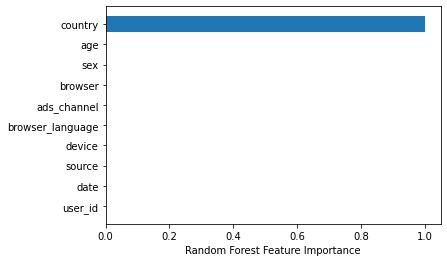

In [285]:
from sklearn import tree
import matplotlib.pyplot as plt
clf = tree.DecisionTreeClassifier(max_depth = 1)
clf = clf.fit(tree_data_variable, tree_data_test)
plt.barh(tree_data_variable.columns, clf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

# we can find the feature importance from the Random Forest model, the country have more importance for the model.
# look at the country

all_table.groupby(['country', 'test']).count()

#Argentina and Uruguay have more user in test1, we can drop the data of these two country and do a t-test again.

In [316]:
new_data = all_table.loc[all_table['country'] != 'Argentina']
new_data = new_data.loc[new_data['country'] != 'Uruguay']
new_data = new_data.loc[new_data['country'] != 'Spain']
new_data_conversion = new_data.groupby(['country', 'test']).mean()['conversion']
new_data_conversion = new_data_conversion.reset_index()
new_data_conversion

,country,test,conversion
0,Bolivia,0,0.049369
1,Bolivia,1,0.047901
2,Chile,0,0.048107
3,Chile,1,0.051295
4,Colombia,0,0.052089
5,Colombia,1,0.050571
6,Costa Rica,0,0.052256
7,Costa Rica,1,0.054738
8,Ecuador,0,0.049154
9,Ecuador,1,0.048988


In [320]:
new_data_conversion_0 = new_data_conversion[new_data_conversion['test'] == 0]
new_data_conversion_1 = new_data_conversion[new_data_conversion['test'] == 1]
print(new_data_conversion_1['conversion'].var(), new_data_conversion_0['conversion'].var())

4.856128476713317e-06 3.6099062204188913e-06


In [322]:
stats.ttest_ind(a = new_data_conversion_1['conversion'], b = new_data_conversion_0['conversion'], equal_var= True )



Ttest_indResult(statistic=-0.2382848580650703, pvalue=0.8135281786378734)

After we remove the data of two country, the result of t-test was fail to reject the null hypothesis,
that's mean there are no significant difference between two test. Not a great success given that the
goal was to improve conversion rate, but at least we know that a localized translation didn’t make things
worse!


